## Import datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_bene_df = pd.read_csv("raw/Train_Beneficiarydata.csv")
train_ip_df = pd.read_csv("raw/Train_Inpatientdata.csv")
train_op_df = pd.read_csv("raw/Train_Outpatientdata.csv")
train_tgt_lbls_df = pd.read_csv("raw/Train.csv")

## Missing values

In [ ]:
# Check missing values - Beneficiary Data
for column in train_bene_df.columns:
    if train_bene_df[column].isna().sum() != 0:
        print(column, train_bene_df[column].isna().sum(), train_bene_df[column].isna().sum() / len(train_bene_df)*100)

DOD 137135 98.97442189439649


In [ ]:
# Filling the Null values as MAX Date of Death in the Dataset
train_bene_df['DOD'] = pd.to_datetime(train_bene_df['DOD'], format="%Y-%m-%d")
train_bene_df['DOD'].fillna(value=train_bene_df['DOD'].max(), inplace=True)

In [ ]:
# Check missing values - Inpatient Data
for column in train_ip_df.columns:
    if train_ip_df[column].isna().sum() != 0:
        print(column, train_ip_df[column].isna().sum(), train_ip_df[column].isna().sum() / len(train_ip_df)*100)

AttendingPhysician 112 0.2767208578346593
OperatingPhysician 16644 41.122696051786335
OtherPhysician 35784 88.41231407817364
DeductibleAmtPaid 899 2.2211790285121316
ClmDiagnosisCode_2 226 0.5583831595592231
ClmDiagnosisCode_3 676 1.6702080347877652
ClmDiagnosisCode_4 1534 3.7900874635568513
ClmDiagnosisCode_5 2894 7.150269308691999
ClmDiagnosisCode_6 4838 11.9533527696793
ClmDiagnosisCode_7 7258 17.932499876463904
ClmDiagnosisCode_8 9942 24.563917576715916
ClmDiagnosisCode_9 13497 33.347334091021395
ClmDiagnosisCode_10 36547 90.29747492217226
ClmProcedureCode_1 17326 42.80772841824381
ClmProcedureCode_2 35020 86.52468251223007
ClmProcedureCode_3 39509 97.61575332312101
ClmProcedureCode_4 40358 99.71339625438553
ClmProcedureCode_5 40465 99.97776350249543
ClmProcedureCode_6 40474 100.0


In [ ]:
train_ip_df[['DeductibleAmtPaid']] = train_ip_df[['DeductibleAmtPaid']].fillna(value = 0)

In [ ]:
# Check missing values - Outpatient Data
for column in train_op_df.columns:
    if train_op_df[column].isna().sum() != 0:
        print(column, train_op_df[column].isna().sum(), train_op_df[column].isna().sum() / len(train_op_df)*100)

AttendingPhysician 1396 0.26963496910593604
OperatingPhysician 427120 82.4974842439308
OtherPhysician 322691 62.32720473908567
ClmDiagnosisCode_1 10453 2.018978747897098
ClmDiagnosisCode_2 195380 37.73730677931073
ClmDiagnosisCode_3 314480 60.741264387130926
ClmDiagnosisCode_4 392141 75.74135130384731
ClmDiagnosisCode_5 443393 85.6405858572982
ClmDiagnosisCode_6 468981 90.58286350019411
ClmDiagnosisCode_7 484776 93.63364024591635
ClmDiagnosisCode_8 494825 95.57458709731003
ClmDiagnosisCode_9 502899 97.13406613782674
ClmDiagnosisCode_10 516654 99.79082043585836
ClmProcedureCode_1 517575 99.96870998209516
ClmProcedureCode_2 517701 99.99304666268782
ClmProcedureCode_3 517733 99.9992274069653
ClmProcedureCode_4 517735 99.99961370348267
ClmProcedureCode_5 517737 100.0
ClmProcedureCode_6 517737 100.0
ClmAdmitDiagnosisCode 412312 79.63734482951769


## Outliers

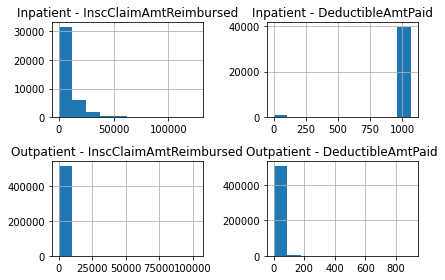

In [ ]:
# Inpatient and Outpatient data
ipop_vars = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']
figure, axis = plt.subplots(2, 2)

train_ip_df['InscClaimAmtReimbursed'].hist(ax = axis[0,0])
axis[0,0].title.set_text("Inpatient - InscClaimAmtReimbursed")

train_ip_df['DeductibleAmtPaid'].hist(ax = axis[0,1])
axis[0,1].title.set_text("Inpatient - DeductibleAmtPaid")

train_op_df['InscClaimAmtReimbursed'].hist(ax = axis[1,0])
axis[1,0].title.set_text("Outpatient - InscClaimAmtReimbursed")

train_op_df['DeductibleAmtPaid'].hist(ax = axis[1,1])
axis[1,1].title.set_text("Outpatient - DeductibleAmtPaid")

# Combine all the operations and display
plt.tight_layout()

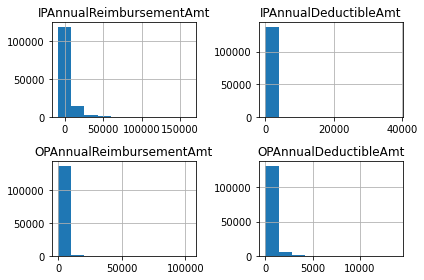

In [ ]:
# Beneficiary Data
bene_vars = ['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']
figure, axis = plt.subplots(2, 2)

train_bene_df['IPAnnualReimbursementAmt'].hist(ax = axis[0,0])
axis[0,0].title.set_text("IPAnnualReimbursementAmt")

train_bene_df['IPAnnualDeductibleAmt'].hist(ax = axis[0,1])
axis[0,1].title.set_text("IPAnnualDeductibleAmt")

train_bene_df['OPAnnualReimbursementAmt'].hist(ax = axis[1,0])
axis[1,0].title.set_text("OPAnnualReimbursementAmt")

train_bene_df['OPAnnualDeductibleAmt'].hist(ax = axis[1,1])
axis[1,1].title.set_text("OPAnnualDeductibleAmt")

# Combine all the operations and display
plt.tight_layout()

In [ ]:
# Transform variables in ip dataset
for var in ipop_vars:
    train_ip_df[var] = np.log(train_ip_df[var].apply(lambda x: x+1))
# Transform variables in op dataset
for var in ipop_vars:
    train_op_df[var] = np.log(train_op_df[var].apply(lambda x: x+1))

# Transform variables in beneficiary dataset
for var in bene_vars:
    if var == 'IPAnnualReimbursementAmt' or var == 'OPAnnualReimbursementAmt':
        train_bene_df[var] = train_bene_df[var].apply(lambda x: np.log(np.abs(x)+1) if x > 0 else -np.log(np.abs(x)+1))
    else:
        train_bene_df[var] = np.log(train_bene_df[var].apply(lambda x: x+1))

## Merge Datasets

In [ ]:
# Merge the inpatient and outpatient data for common columns
train_ip_df["Admitted"] = 1
train_op_df["Admitted"] = 0
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_df.shape,train_op_df.shape,train_ip_op_df.shape

((40474, 31), (517737, 28), (558211, 31))

In [ ]:
# join the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

In [ ]:
# join the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

In [ ]:
for column in train_iobp_df.columns:
    if train_iobp_df[column].isna().sum() != 0:
        print(column, train_iobp_df[column].isna().sum())

AttendingPhysician 1508
OperatingPhysician 443764
OtherPhysician 358475
AdmissionDt 517737
ClmAdmitDiagnosisCode 412312
DischargeDt 517737
DiagnosisGroupCode 517737
ClmDiagnosisCode_1 10453
ClmDiagnosisCode_2 195606
ClmDiagnosisCode_3 315156
ClmDiagnosisCode_4 393675
ClmDiagnosisCode_5 446287
ClmDiagnosisCode_6 473819
ClmDiagnosisCode_7 492034
ClmDiagnosisCode_8 504767
ClmDiagnosisCode_9 516396
ClmDiagnosisCode_10 553201
ClmProcedureCode_1 534901
ClmProcedureCode_2 552721
ClmProcedureCode_3 557242
ClmProcedureCode_4 558093
ClmProcedureCode_5 558202
ClmProcedureCode_6 558211


## Feature Engineering

### Add new features

In [ ]:
# is_alive based on DOD
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

train_iobp_df['Is_Alive'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [ ]:
# claim duraiton
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")
train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

In [ ]:
# add admission duration
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")
train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)

In [ ]:
# add age
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

### Feature Encoding

In [ ]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive'] = train_iobp_df['Is_Alive'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [ ]:
# One hot encoding for categorical features - Race
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Race'], drop_first=True)

In [ ]:
# State and Country
# train_iobp_df = pd.get_dummies(train_iobp_df,columns=['State'], drop_first=True)
# train_iobp_df = pd.get_dummies(train_iobp_df,columns=['County'], drop_first=True)

### Physician based features

In [ ]:
# add Total Number of claims or cases seen by Attending Physician
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
# add Total Number of claims or cases seen by Opearting Physician
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
# add Total Number of claims or cases seen by Other Physician
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')

train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [ ]:
train_iobp_df[['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims', 'Att_Opr_Oth_Phy_Tot_Claims']].corr()

,Att_Phy_tot_claims,Opr_Phy_tot_claims,Oth_Phy_tot_claims,Att_Opr_Oth_Phy_Tot_Claims
Att_Phy_tot_claims,1.000000,0.345131,0.433731,0.946627
Opr_Phy_tot_claims,0.345131,1.000000,0.192137,0.402338
Oth_Phy_tot_claims,0.433731,0.192137,1.000000,0.695084
Att_Opr_Oth_Phy_Tot_Claims,0.946627,0.402338,0.695084,1.000000


In [ ]:
# keep Att_Phy_tot_claims Opr_Phy_tot_claims Oth_Phy_tot_claims (remove Att_Opr_Oth_Phy_Tot_Claims)
train_iobp_df.drop(['Att_Opr_Oth_Phy_Tot_Claims'], axis=1, inplace=True)

### Provider based features

In [ ]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

train_iobp_df['Prv_Tot_Att_Phy'].fillna(value=0, inplace=True)
train_iobp_df['Prv_Tot_Opr_Phy'].fillna(value=0, inplace=True)
train_iobp_df['Prv_Tot_Oth_Phy'].fillna(value=0, inplace=True)

train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [ ]:
train_iobp_df[['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy', 'Prv_Tot_Att_Opr_Oth_Phys']].corr()

,Prv_Tot_Att_Phy,Prv_Tot_Opr_Phy,Prv_Tot_Oth_Phy,Prv_Tot_Att_Opr_Oth_Phys
Prv_Tot_Att_Phy,1.000000,0.993073,0.995334,0.999734
Prv_Tot_Opr_Phy,0.993073,1.000000,0.984460,0.993397
Prv_Tot_Oth_Phy,0.995334,0.984460,1.000000,0.996936
Prv_Tot_Att_Opr_Oth_Phys,0.999734,0.993397,0.996936,1.000000


In [ ]:
train_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

### Other Provider based features (unique counts) 

In [ ]:
# Total Unique Claim Admit Codes used by a PROVIDER
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')
# Total Unique Number of Diagnosis Group Codes used by a PROVIDER
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')
# Total Unique Date of Birth years of beneficiaries provided by a Provider
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')
train_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

### Other Provider based features (aggregated amounts)

In [ ]:
# Mean of patients age treated by a Provider
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('mean')
# Mean of Insc Claim Re-Imb Amount for a Provider
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')
# Total number of RKD Patients seen by a Provider
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [ ]:
# Mean value of these continuous variables
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('mean')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('mean')

In [ ]:
train_iobp_df.shape

(558211, 79)

In [ ]:
train_iobp_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted', 'DOB', 'DOD', 'Gender',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'Chroni

### (Extra) Other aggregated features at different levels

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
extra_train_iobp_df = train_iobp_df.copy()

In [ ]:
def create_agg_feats(grp_col, feat_name, operation='mean'):
    """
    Description :: This function is created for adding the aggregated features in the dataset for every level like:
        - Beneficiary
        - Attending Physician
        - Operating Physician
        - Other Physician and etc..
        
    Input Parameters :: It accepts below inputs:
        - grp_col : `str`
            - It represents the feature or level at which you want to perform the aggregation.
        
        - feat_name : `str`
            - It represents the feature whose aggregated aspect you want to capture.
        
        - operation : `str`
            - It represents the aggregation operation you want to perform.(By default it is SUM)
    """
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    extra_train_iobp_df[feat_1] = extra_train_iobp_df.groupby(grp_col)['InscClaimAmtReimbursed'].transform(operation)

    feat_2 = feat_name + "_CoPayment"
    extra_train_iobp_df[feat_2] = extra_train_iobp_df.groupby(grp_col)['DeductibleAmtPaid'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    extra_train_iobp_df[feat_3] = extra_train_iobp_df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    extra_train_iobp_df[feat_4] = extra_train_iobp_df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    extra_train_iobp_df[feat_5] = extra_train_iobp_df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    extra_train_iobp_df[feat_6] = extra_train_iobp_df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)

    feat_7 = feat_name + "_Admit_Duration"
    extra_train_iobp_df[feat_7] = extra_train_iobp_df.groupby(grp_col)['Admitted_Duration'].transform(operation)

    feat_8 = feat_name + "_Claim_Duration"
    extra_train_iobp_df[feat_8] = extra_train_iobp_df.groupby(grp_col)['Claim_Duration'].transform(operation)

In [ ]:
# BENE, PHYs, Diagnosis Admit and Group Codes columns
create_agg_feats(grp_col='BeneID', feat_name="BENE")
create_agg_feats(grp_col='AttendingPhysician', feat_name="ATT_PHY")
create_agg_feats(grp_col='OperatingPhysician', feat_name="OPT_PHY")
create_agg_feats(grp_col='OtherPhysician', feat_name="OTH_PHY")
create_agg_feats(grp_col='ClmAdmitDiagnosisCode', feat_name="Claim_Admit_Diag_Code")
create_agg_feats(grp_col='DiagnosisGroupCode', feat_name="Diag_GCode")

In [ ]:
# Diagnosis Codes columns
create_agg_feats(grp_col='ClmDiagnosisCode_1', feat_name="Claim_DiagCode1")
create_agg_feats(grp_col='ClmDiagnosisCode_2', feat_name="Claim_DiagCode2")
create_agg_feats(grp_col='ClmDiagnosisCode_3', feat_name="Claim_DiagCode3")
create_agg_feats(grp_col='ClmDiagnosisCode_4', feat_name="Claim_DiagCode4")
create_agg_feats(grp_col='ClmDiagnosisCode_5', feat_name="Claim_DiagCode5")
create_agg_feats(grp_col='ClmDiagnosisCode_6', feat_name="Claim_DiagCode6")
create_agg_feats(grp_col='ClmDiagnosisCode_7', feat_name="Claim_DiagCode7")
create_agg_feats(grp_col='ClmDiagnosisCode_8', feat_name="Claim_DiagCode8")
create_agg_feats(grp_col='ClmDiagnosisCode_9', feat_name="Claim_DiagCode9")
create_agg_feats(grp_col='ClmDiagnosisCode_10', feat_name="Claim_DiagCode10")

# Medical Procedure Codes columns
create_agg_feats(grp_col='ClmProcedureCode_1', feat_name="Claim_ProcCode1")
create_agg_feats(grp_col='ClmProcedureCode_2', feat_name="Claim_ProcCode2")
create_agg_feats(grp_col='ClmProcedureCode_3', feat_name="Claim_ProcCode3")

In [ ]:
extra_train_iobp_df.shape

(558211, 231)

## Remove Unnecessary Features

In [ ]:
train_iobp_df.drop(columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt','AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode','DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD','State', 'County'], inplace = True)

In [ ]:
cor = train_iobp_df.corr()
high_cor = []
for r in cor.columns:
    for c in cor.columns:
        if np.abs(cor.at[r,c]) > 0.8 and r!=c:
            high_cor.append((r,c,cor.at[r,c]))
high_cor

[('DeductibleAmtPaid', 'Admitted', 0.9011176265991686),
 ('Admitted', 'DeductibleAmtPaid', 0.9011176265991686),
 ('IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 0.9846597295007358),
 ('IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 0.9846597295007358),
 ('Prv_Tot_Att_Opr_Oth_Phys', 'PRV_Tot_Admit_DCodes', 0.9406043516456425),
 ('Prv_Tot_Att_Opr_Oth_Phys', 'PRV_Tot_RKD_Patients', 0.9946065307802773),
 ('PRV_Tot_Admit_DCodes', 'Prv_Tot_Att_Opr_Oth_Phys', 0.9406043516456425),
 ('PRV_Tot_Admit_DCodes', 'PRV_Tot_RKD_Patients', 0.9520603430566226),
 ('PRV_Insc_Clm_ReImb_Amt', 'PRV_CoPayment', 0.9683174435536055),
 ('PRV_Insc_Clm_ReImb_Amt', 'PRV_IP_Annual_ReImb_Amt', 0.8786908654365216),
 ('PRV_Insc_Clm_ReImb_Amt', 'PRV_IP_Annual_Ded_Amt', 0.8780180616630442),
 ('PRV_Insc_Clm_ReImb_Amt', 'PRV_Admit_Duration', 0.9477036750719157),
 ('PRV_Insc_Clm_ReImb_Amt', 'PRV_Claim_Duration', 0.8186659089925402),
 ('PRV_Tot_RKD_Patients', 'Prv_Tot_Att_Opr_Oth_Phys', 0.9946065307802773),
 ('PRV_

In [ ]:
train_iobp_df.drop(['Admitted','IPAnnualDeductibleAmt','PRV_Insc_Clm_ReImb_Amt', 'PRV_IP_Annual_ReImb_Amt', 'PRV_IP_Annual_Ded_Amt', 
                    'PRV_IP_Annual_Ded_Amt', 'PRV_Admit_Duration', 'PRV_Claim_Duration','PRV_OP_Annual_Ded_Amt','PRV_Tot_Admit_DCodes', 
                    'PRV_Tot_RKD_Patients'], axis=1, inplace=True)

In [ ]:
cor = train_iobp_df.corr()
high_cor = []
for r in cor.columns:
    for c in cor.columns:
        if np.abs(cor.at[r,c]) > 0.8 and r!=c:
            high_cor.append((r,c,cor.at[r,c]))
high_cor

[]

In [ ]:
# Double check missing values
for column in train_iobp_df.columns:
    if train_iobp_df[column].isna().sum() != 0:
        print(column, train_iobp_df[column].isna().sum(), train_iobp_df[column].isna().sum() / len(train_iobp_df)*100)

In [ ]:
train_iobp_df.select_dtypes(exclude=[np.number]).columns

Index(['Provider'], dtype='object')

In [ ]:
train_iobp_df = train_iobp_df.groupby(['Provider'],as_index=False).agg('mean')
print(train_iobp_df.shape)
train_iobp_df.head()

(5410, 38)


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,Race_5,Att_Phy_tot_claims,Opr_Phy_tot_claims,Oth_Phy_tot_claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt
0,PRV51001,6.073241,1.394896,0.360000,0.320000,12.000000,12.000000,0.600000,0.760000,0.680000,...,0.000000,3.160000,0.280000,0.560000,40.0,5.0,19.0,78.804000,1.394896,6.988338
1,PRV51003,6.555900,3.308185,0.409091,0.219697,11.818182,11.871212,0.424242,0.606061,0.484848,...,0.007576,17.113636,6.113636,0.234848,202.0,58.0,43.0,70.044697,3.308185,6.626530
2,PRV51004,4.458983,0.169448,0.308725,0.154362,11.865772,11.959732,0.429530,0.590604,0.335570,...,0.000000,8.463087,0.355705,2.073826,239.0,0.0,47.0,72.229530,0.169448,6.912908
3,PRV51005,4.368165,0.174175,0.438627,0.222318,11.907296,11.939914,0.365665,0.583691,0.435193,...,0.000000,219.382833,7.884979,53.828326,1863.0,0.0,66.0,70.509528,0.174175,6.973989
4,PRV51007,4.622294,0.378516,0.472222,0.152778,11.833333,11.833333,0.361111,0.555556,0.305556,...,0.000000,29.083333,0.750000,2.694444,110.0,3.0,35.0,69.275000,0.378516,6.872038


In [ ]:
train_iobp_df['PotentialFraud'].value_counts()

0.0    4904
1.0     506
Name: PotentialFraud, dtype: int64

In [ ]:
train_iobp_df.drop(columns = ['Provider'], inplace = True)
train_iobp_df.to_csv('Train_data_new.csv')

In [ ]:
train_iobp_df.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'Is_Alive', 'Claim_Duration', 'Admitted_Duration', 'Bene_Age', 'Race_2',
       'Race_3', 'Race_5', 'Att_Phy_tot_claims', 'Opr_Phy_tot_claims',
       'Oth_Phy_tot_claims', 'Prv_Tot_Att_Opr_Oth_Phys', 'PRV_Tot_DGrpCodes',
       'PRV_Tot_Unq_DOB_Years', 'PRV_Bene_Age_Sum', 'PRV_CoPayment',
       'PRV_OP_Annual_ReImb_Amt'],
      dtype='object')

In [ ]:
train_iobp_df_ori = train_iobp_df.copy()
ori_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'Is_Alive', 'Claim_Duration', 'Admitted_Duration', 'Bene_Age', 'Race_2',
       'Race_3', 'Race_5',]
train_iobp_df_ori = train_iobp_df_ori[ori_columns]
train_iobp_df_ori.to_csv('Train_data_ori.csv')

In [ ]:
extra_train_iobp_df.drop(columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt','AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode','DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD','State', 'County'], inplace = True)
extra_train_iobp_df.drop(['Admitted','IPAnnualDeductibleAmt','PRV_Insc_Clm_ReImb_Amt', 'PRV_IP_Annual_ReImb_Amt', 
                          'PRV_IP_Annual_Ded_Amt', 'PRV_IP_Annual_Ded_Amt', 'PRV_Admit_Duration', 'PRV_Claim_Duration',
                          'PRV_OP_Annual_Ded_Amt','PRV_Tot_Admit_DCodes', 'PRV_Tot_RKD_Patients'], axis=1, inplace=True)

In [ ]:
remove_columns = []
for column in extra_train_iobp_df.columns:
    if extra_train_iobp_df[column].isna().sum() != 0:
        print(column, extra_train_iobp_df[column].isna().sum(), extra_train_iobp_df[column].isna().sum() / len(extra_train_iobp_df)*100)
        if extra_train_iobp_df[column].isna().sum() / len(extra_train_iobp_df) > 0.8:
            remove_columns.append(column)

ATT_PHY_Insc_ReImb_Amt 1508 0.27014874303802683
ATT_PHY_CoPayment 1508 0.27014874303802683
ATT_PHY_IP_Annual_ReImb_Amt 1508 0.27014874303802683
ATT_PHY_IP_Annual_Ded_Amt 1508 0.27014874303802683
ATT_PHY_OP_Annual_ReImb_Amt 1508 0.27014874303802683
ATT_PHY_OP_Annual_Ded_Amt 1508 0.27014874303802683
ATT_PHY_Admit_Duration 1508 0.27014874303802683
ATT_PHY_Claim_Duration 1508 0.27014874303802683
OPT_PHY_Insc_ReImb_Amt 443764 79.49753766944757
OPT_PHY_CoPayment 443764 79.49753766944757
OPT_PHY_IP_Annual_ReImb_Amt 443764 79.49753766944757
OPT_PHY_IP_Annual_Ded_Amt 443764 79.49753766944757
OPT_PHY_OP_Annual_ReImb_Amt 443764 79.49753766944757
OPT_PHY_OP_Annual_Ded_Amt 443764 79.49753766944757
OPT_PHY_Admit_Duration 443764 79.49753766944757
OPT_PHY_Claim_Duration 443764 79.49753766944757
OTH_PHY_Insc_ReImb_Amt 358475 64.21854818339303
OTH_PHY_CoPayment 358475 64.21854818339303
OTH_PHY_IP_Annual_ReImb_Amt 358475 64.21854818339303
OTH_PHY_IP_Annual_Ded_Amt 358475 64.21854818339303
OTH_PHY_OP_Annu

In [ ]:
extra_train_iobp_df.drop(columns = remove_columns, inplace = True)
extra_train_iobp_df.fillna(value = 0, inplace = True)
extra_train_iobp_df.shape

(558211, 118)

In [ ]:
cor = extra_train_iobp_df.corr()
high_cor = []
for r in cor.columns:
    for c in cor.columns:
        if np.abs(cor.at[r,c]) > 0.9 and r!=c:
            high_cor.append((r,c,cor.at[r,c]))
print(len(high_cor))
high_cor

140


[('IPAnnualReimbursementAmt', 'BENE_IP_Annual_ReImb_Amt', 1.0),
 ('IPAnnualReimbursementAmt', 'BENE_IP_Annual_Ded_Amt', 0.9846597295007358),
 ('OPAnnualReimbursementAmt', 'BENE_OP_Annual_ReImb_Amt', 1.0),
 ('OPAnnualDeductibleAmt', 'BENE_OP_Annual_Ded_Amt', 1.0),
 ('BENE_IP_Annual_ReImb_Amt', 'IPAnnualReimbursementAmt', 1.0),
 ('BENE_IP_Annual_ReImb_Amt', 'BENE_IP_Annual_Ded_Amt', 0.9846597295007358),
 ('BENE_IP_Annual_Ded_Amt', 'IPAnnualReimbursementAmt', 0.9846597295007358),
 ('BENE_IP_Annual_Ded_Amt', 'BENE_IP_Annual_ReImb_Amt', 0.9846597295007358),
 ('BENE_OP_Annual_ReImb_Amt', 'OPAnnualReimbursementAmt', 1.0),
 ('BENE_OP_Annual_Ded_Amt', 'OPAnnualDeductibleAmt', 1.0),
 ('ATT_PHY_IP_Annual_ReImb_Amt',
  'ATT_PHY_IP_Annual_Ded_Amt',
  0.9907875758796929),
 ('ATT_PHY_IP_Annual_Ded_Amt',
  'ATT_PHY_IP_Annual_ReImb_Amt',
  0.9907875758796929),
 ('OPT_PHY_Insc_ReImb_Amt', 'OPT_PHY_OP_Annual_ReImb_Amt', 0.9137724612134821),
 ('OPT_PHY_IP_Annual_ReImb_Amt',
  'OPT_PHY_IP_Annual_Ded_Amt',


In [ ]:
extra_train_iobp_df.drop(columns = ['ATT_PHY_CoPayment', 'BENE_IP_Annual_ReImb_Amt','ATT_PHY_IP_Annual_Ded_Amt',
                                         'OPT_PHY_IP_Annual_ReImb_Amt', 'BENE_IP_Annual_Ded_Amt', 'BENE_IP_Annual_Ded_Amt',
                                         'BENE_OP_Annual_ReImb_Amt','BENE_OP_Annual_Ded_Amt','Claim_Admit_Diag_Code_CoPayment',
                                         'OPT_PHY_Insc_ReImb_Amt', 'OPT_PHY_OP_Annual_Ded_Amt', 'OTH_PHY_Insc_ReImb_Amt',
                                         'OTH_PHY_IP_Annual_ReImb_Amt', 'Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt',
                                         'OTH_PHY_OP_Annual_ReImb_Amt', 'Claim_Admit_Diag_Code_Insc_ReImb_Amt',
                                         'Claim_DiagCode1_IP_Annual_ReImb_Amt', 'Claim_DiagCode1_Admit_Duration',
                                         'Claim_DiagCode1_OP_Annual_ReImb_Amt','Claim_Admit_Diag_Code_OP_Annual_Ded_Amt',
                                         'Claim_DiagCode2_IP_Annual_ReImb_Amt', 'Claim_DiagCode2_Admit_Duration',
                                         'Claim_DiagCode2_OP_Annual_ReImb_Amt','Claim_DiagCode2_IP_Annual_Ded_Amt',
                                         'Claim_DiagCode2_Insc_ReImb_Amt', 'Claim_DiagCode3_IP_Annual_ReImb_Amt', 
                                         'Claim_DiagCode3_Admit_Duration','Claim_DiagCode3_OP_Annual_ReImb_Amt',
                                         'Claim_DiagCode3_IP_Annual_Ded_Amt','Claim_DiagCode3_Insc_ReImb_Amt',
                                         'Claim_DiagCode4_IP_Annual_ReImb_Amt', 'Claim_DiagCode4_Admit_Duration',
                                         'Claim_DiagCode4_OP_Annual_ReImb_Amt','Claim_DiagCode4_IP_Annual_Ded_Amt',
                                         'Claim_DiagCode4_Insc_ReImb_Amt','Claim_DiagCode5_IP_Annual_ReImb_Amt', 
                                         'Claim_DiagCode5_Admit_Duration','Claim_DiagCode5_OP_Annual_ReImb_Amt',
                                         'Claim_DiagCode5_IP_Annual_Ded_Amt','Claim_DiagCode5_Insc_ReImb_Amt'], inplace = True)
extra_train_iobp_df.shape

(558211, 79)

In [ ]:
extra_train_iobp_df = extra_train_iobp_df.groupby(['Provider'],as_index=False).agg('mean')
print(extra_train_iobp_df.shape)
extra_train_iobp_df.head()

(5410, 79)


,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,Claim_DiagCode2_Claim_Duration,Claim_DiagCode3_CoPayment,Claim_DiagCode3_OP_Annual_Ded_Amt,Claim_DiagCode3_Claim_Duration,Claim_DiagCode4_CoPayment,Claim_DiagCode4_OP_Annual_Ded_Amt,Claim_DiagCode4_Claim_Duration,Claim_DiagCode5_CoPayment,Claim_DiagCode5_OP_Annual_Ded_Amt,Claim_DiagCode5_Claim_Duration
0,PRV51001,6.073241,1.394896,0.360000,0.320000,12.000000,12.000000,0.600000,0.760000,0.680000,...,1.397607,0.798494,2.212883,0.900720,0.797085,1.738717,1.053287,0.818717,1.754439,0.841667
1,PRV51003,6.555900,3.308185,0.409091,0.219697,11.818182,11.871212,0.424242,0.606061,0.484848,...,2.560818,1.330053,3.885529,2.330113,1.525406,3.260470,2.287669,1.588612,2.667206,1.961731
2,PRV51004,4.458983,0.169448,0.308725,0.154362,11.865772,11.959732,0.429530,0.590604,0.335570,...,1.349532,0.449332,2.114734,0.888759,0.383381,1.282129,0.668385,0.288684,0.892618,0.419678
3,PRV51005,4.368165,0.174175,0.438627,0.222318,11.907296,11.939914,0.365665,0.583691,0.435193,...,1.217246,0.435322,2.181215,0.903030,0.345099,1.375334,0.663333,0.243214,0.791252,0.449872
4,PRV51007,4.622294,0.378516,0.472222,0.152778,11.833333,11.833333,0.361111,0.555556,0.305556,...,0.950185,0.394191,2.243240,0.871424,0.471953,1.634575,0.700242,0.455557,1.070842,0.547213


In [ ]:
extra_train_iobp_df.to_csv('Train_data_extra.csv')

## Train-Validation-Test Split

In [ ]:
train_data_ori = pd.read_csv("Train_data_ori.csv")
train_data_new = pd.read_csv("Train_data_new.csv")
train_data_extra = pd.read_csv("Train_data_extra.csv")
train_data_extra.drop(columns = ['Provider'], inplace = True)

In [ ]:
train_data_ori.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data_new.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data_extra.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

y = train_data_ori['PotentialFraud']
X = train_data_ori.drop(columns = ['PotentialFraud'])

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 1)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 1)

print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(4328, 27) (4328,)
(541, 27) (541,)
(541, 27) (541,)


In [ ]:
X_train.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Is_Alive,Claim_Duration,Admitted_Duration,Bene_Age,Race_2,Race_3,Race_5
1242,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,4.664106,7.624124,5.332859,1.0,0.000000,0.000000,74.350000,0.000000,0.000000,0.000000
4338,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,5.461010,7.291025,6.276063,1.0,0.333333,0.250000,74.516667,0.083333,0.000000,0.000000
2652,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,2.895693,7.346198,5.545476,1.0,2.562500,0.000000,68.131250,0.187500,0.000000,0.000000
1596,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,2.852481,6.922563,5.658661,1.0,1.994298,0.497505,75.368140,0.006415,0.012830,0.001426
133,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,3.136439,6.981401,5.751723,1.0,1.576271,0.000000,73.357627,0.067797,0.050847,0.000000


In [ ]:
X_train.to_csv("data/x_train_ori.csv",index = False)
y_train.to_csv("data/y_train_ori.csv",index = False)
X_valid.to_csv("data/x_valid_ori.csv",index = False)
y_valid.to_csv("data/y_valid_ori.csv",index = False)
X_test.to_csv("data/x_test_ori.csv",index = False)
y_test.to_csv("data/y_test_ori.csv",index = False)

In [ ]:
# split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

y = train_data_new['PotentialFraud']
X = train_data_new.drop(columns = ['PotentialFraud'])

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 1)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 1)

print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(4328, 36) (4328,)
(541, 36) (541,)
(541, 36) (541,)


In [ ]:
X_train.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_5,Att_Phy_tot_claims,Opr_Phy_tot_claims,Oth_Phy_tot_claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt
1242,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,2.0,0.0,2.0,74.350000,0.000000,7.624124
4338,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,0.000000,2.166667,0.166667,0.250000,16.0,2.0,10.0,74.516667,1.162413,7.291025
2652,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,0.000000,17.000000,2.250000,1.562500,27.0,0.0,13.0,68.131250,0.000000,7.346198
1596,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,0.001426,26.811832,1.590164,6.294369,2230.0,110.0,62.0,75.368140,0.709673,6.922563
133,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,0.000000,3.288136,0.220339,0.355932,88.0,0.0,34.0,73.357627,0.214173,6.981401


In [ ]:
X_train.to_csv("data/x_train_new.csv",index = False)
y_train.to_csv("data/y_train_new.csv",index = False)
X_valid.to_csv("data/x_valid_new.csv",index = False)
y_valid.to_csv("data/y_valid_new.csv",index = False)
X_test.to_csv("data/x_test_new.csv",index = False)
y_test.to_csv("data/y_test_new.csv",index = False)

In [ ]:
# split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

y = train_data_extra['PotentialFraud']
X = train_data_extra.drop(columns = ['PotentialFraud'])

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state = 1)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 1)

print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(4328, 77) (4328,)
(541, 77) (541,)
(541, 77) (541,)


In [ ]:
X_train.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Claim_DiagCode2_Claim_Duration,Claim_DiagCode3_CoPayment,Claim_DiagCode3_OP_Annual_Ded_Amt,Claim_DiagCode3_Claim_Duration,Claim_DiagCode4_CoPayment,Claim_DiagCode4_OP_Annual_Ded_Amt,Claim_DiagCode4_Claim_Duration,Claim_DiagCode5_CoPayment,Claim_DiagCode5_OP_Annual_Ded_Amt,Claim_DiagCode5_Claim_Duration
1242,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,1.774404,0.298021,2.789442,0.766355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4338,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,0.878437,0.424500,2.384802,0.963079,0.640044,2.372691,0.689329,0.704179,1.271725,0.537437
2652,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,1.505765,0.271948,2.425444,0.993107,0.518815,1.791543,1.155439,0.302092,1.401699,0.519838
1596,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,1.560886,0.555149,2.403118,1.228425,0.528614,1.674614,0.941360,0.530145,1.087917,0.711794
133,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,1.768799,0.377735,2.004513,0.801645,0.348415,1.452929,0.623920,0.352007,1.193134,0.975720


In [ ]:
X_train.to_csv("data/x_train_extra.csv",index = False)
y_train.to_csv("data/y_train_extra.csv",index = False)
X_valid.to_csv("data/x_valid_extra.csv",index = False)
y_valid.to_csv("data/y_valid_extra.csv",index = False)
X_test.to_csv("data/x_test_extra.csv",index = False)
y_test.to_csv("data/y_test_extra.csv",index = False)

## Adding Graph Features

In [ ]:
import networkx as nx

In [ ]:
### train Providers
providers = extra_train_iobp_df['Provider']
train_providers = extra_train_iobp_df['Provider'][X_train.index]
### valid Providers
valid_providers = extra_train_iobp_df['Provider'][X_valid.index]
### test Providers
test_providers = extra_train_iobp_df['Provider'][X_test.index]

In [ ]:
### use the providers within train data to derive the graph features for train dataset
full_data_graph = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_data_graph = full_data_graph.loc[full_data_graph.Provider.isin(train_providers)]
print(train_data_graph.shape)
train_data_graph.head()

(457266, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,10.165890,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,10.491302,8.072467,4.110874,4.262680,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,3.931826,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,10.085851,7.667158,6.111467,5.303305,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,9.852247,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,9.852247,6.974479,4.615121,3.044522,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,9.741027,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,9.741027,6.974479,6.957497,6.293419,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,9.472782,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,10.203629,7.667158,6.111467,5.081404,Yes


In [ ]:
source = 'Provider'
target = 'AttendingPhysician'

G = nx.from_pandas_edgelist(train_data_graph, source=source, target = target)

nodes_info_dict = {
  'closeness_centrality': nx.closeness_centrality,
  'eigenvector_centrality': nx.eigenvector_centrality_numpy,
  'pagerank': nx.pagerank
}

columns_with_node_infos = ['degree'] + list(nodes_info_dict.keys())

nodes_info = pd.DataFrame.from_dict(dict(nx.degree(G)), orient='index').rename(columns = {0 : 'degree'}).reset_index()

# computing graph features for each node
for info, fun in nodes_info_dict.items():
    temp = pd.DataFrame.from_dict(fun(G), orient='index').rename(columns = {0 : info}).reset_index()
    nodes_info = nodes_info.merge(temp, on='index')
    
nodes_info = nodes_info.rename(columns = {'index': 'Physician'})

# adding graph features to the dataframe
df_enriched = train_data_graph[['Provider','PotentialFraud', 'AttendingPhysician']].merge(nodes_info, left_on = 'Provider',  
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'Provider_'+k for k in columns_with_node_infos}, inplace = True)

df_enriched = df_enriched.merge(nodes_info, left_on = 'AttendingPhysician', 
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'AttendingPhysician_'+k for k in columns_with_node_infos}, inplace = True)

In [ ]:
train_df_enriched = df_enriched.copy()
print(train_df_enriched.shape)
train_df_enriched.head()

(457266, 11)


,Provider,PotentialFraud,AttendingPhysician,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV55912,Yes,PHY390922,69,0.170623,0.02632,0.000414,1,0.140154,0.00094,0.000008
1,PRV55912,Yes,PHY365867,69,0.170623,0.02632,0.000414,1,0.140154,0.00094,0.000008
2,PRV55912,Yes,PHY349293,69,0.170623,0.02632,0.000414,1,0.140154,0.00094,0.000008
3,PRV55912,Yes,PHY334706,69,0.170623,0.02632,0.000414,1,0.140154,0.00094,0.000008
4,PRV55912,Yes,PHY390614,69,0.170623,0.02632,0.000414,1,0.140154,0.00094,0.000008


In [ ]:
### use train + valid dataset to derive the graph features for valid dataset
full_data_graph = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
valid_data_graph = full_data_graph.loc[(full_data_graph.Provider.isin(train_providers)) 
                                       | (full_data_graph.Provider.isin(valid_providers))]
print(valid_data_graph.shape)
valid_data_graph.head()

(503572, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,10.165890,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,10.491302,8.072467,4.110874,4.262680,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,3.931826,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,10.085851,7.667158,6.111467,5.303305,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,9.852247,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,9.852247,6.974479,4.615121,3.044522,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,9.741027,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,9.741027,6.974479,6.957497,6.293419,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,9.472782,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,10.203629,7.667158,6.111467,5.081404,Yes


In [ ]:
source = 'Provider'
target = 'AttendingPhysician'

G = nx.from_pandas_edgelist(valid_data_graph, source=source, target = target)

nodes_info_dict = {
  'closeness_centrality': nx.closeness_centrality,
  'eigenvector_centrality': nx.eigenvector_centrality_numpy,
  'pagerank': nx.pagerank
}

columns_with_node_infos = ['degree'] + list(nodes_info_dict.keys())

nodes_info = pd.DataFrame.from_dict(dict(nx.degree(G)), orient='index').rename(columns = {0 : 'degree'}).reset_index()

# computing graph features for each node
for info, fun in nodes_info_dict.items():
    temp = pd.DataFrame.from_dict(fun(G), orient='index').rename(columns = {0 : info}).reset_index()
    nodes_info = nodes_info.merge(temp, on='index')
    
nodes_info = nodes_info.rename(columns = {'index': 'Physician'})

# adding graph features to the dataframe
df_enriched = valid_data_graph[['Provider','PotentialFraud', 'AttendingPhysician']].merge(nodes_info, left_on = 'Provider',  
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'Provider_'+k for k in columns_with_node_infos}, inplace = True)

df_enriched = df_enriched.merge(nodes_info, left_on = 'AttendingPhysician', 
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'AttendingPhysician_'+k for k in columns_with_node_infos}, inplace = True)

In [ ]:
valid_df_enriched = df_enriched.loc[df_enriched.Provider.isin(valid_providers)].copy()
print(valid_df_enriched.shape)
valid_df_enriched.head()

(46306, 11)


,Provider,PotentialFraud,AttendingPhysician,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
6440,PRV51148,Yes,PHY346286,61,0.174147,0.024937,0.000347,1,0.143373,0.000845,0.000006
6441,PRV51148,Yes,PHY419984,61,0.174147,0.024937,0.000347,1,0.143373,0.000845,0.000006
6442,PRV51148,Yes,PHY431343,61,0.174147,0.024937,0.000347,1,0.143373,0.000845,0.000006
6443,PRV51148,Yes,PHY364468,61,0.174147,0.024937,0.000347,1,0.143373,0.000845,0.000006
6444,PRV51148,Yes,PHY396940,61,0.174147,0.024937,0.000347,1,0.143373,0.000845,0.000006


In [ ]:
### use entire dataset (train + valid + test) to derive the graph features for test dataset
full_data_graph = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
print(full_data_graph.shape)
full_data_graph.head()

(558211, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,10.165890,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,10.491302,8.072467,4.110874,4.262680,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,3.931826,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,10.085851,7.667158,6.111467,5.303305,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,9.852247,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,9.852247,6.974479,4.615121,3.044522,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,9.741027,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,9.741027,6.974479,6.957497,6.293419,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,9.472782,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,10.203629,7.667158,6.111467,5.081404,Yes


In [ ]:
source = 'Provider'
target = 'AttendingPhysician'

G = nx.from_pandas_edgelist(full_data_graph, source=source, target = target)

nodes_info_dict = {
  'closeness_centrality': nx.closeness_centrality,
  'eigenvector_centrality': nx.eigenvector_centrality_numpy,
  'pagerank': nx.pagerank
}

columns_with_node_infos = ['degree'] + list(nodes_info_dict.keys())

nodes_info = pd.DataFrame.from_dict(dict(nx.degree(G)), orient='index').rename(columns = {0 : 'degree'}).reset_index()

# computing graph features for each node
for info, fun in nodes_info_dict.items():
    temp = pd.DataFrame.from_dict(fun(G), orient='index').rename(columns = {0 : info}).reset_index()
    nodes_info = nodes_info.merge(temp, on='index')
    
nodes_info = nodes_info.rename(columns = {'index': 'Physician'})

# adding graph features to the dataframe
df_enriched = full_data_graph[['Provider','PotentialFraud', 'AttendingPhysician']].merge(nodes_info, left_on = 'Provider',  
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'Provider_'+k for k in columns_with_node_infos}, inplace = True)

df_enriched = df_enriched.merge(nodes_info, left_on = 'AttendingPhysician', 
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'AttendingPhysician_'+k for k in columns_with_node_infos}, inplace = True)

In [ ]:
test_df_enriched = df_enriched.loc[df_enriched.Provider.isin(test_providers)].copy()
print(test_df_enriched.shape)
test_df_enriched.head()

(54639, 11)


,Provider,PotentialFraud,AttendingPhysician,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
370,PRV52405,No,PHY369659,17,0.09595,2.632842e-07,0.000073,2,0.108434,8.037065e-07,0.000009
371,PRV52405,No,PHY392961,17,0.09595,2.632842e-07,0.000073,2,0.108434,8.037065e-07,0.000009
372,PRV52405,No,PHY369659,17,0.09595,2.632842e-07,0.000073,2,0.108434,8.037065e-07,0.000009
373,PRV52405,No,PHY369659,17,0.09595,2.632842e-07,0.000073,2,0.108434,8.037065e-07,0.000009
374,PRV52405,No,PHY423095,17,0.09595,2.632842e-07,0.000073,2,0.108434,8.037065e-07,0.000009


In [ ]:
train_graph_fin = train_df_enriched.groupby(['Provider'],as_index=False).agg('mean')
print(train_graph_fin.shape)
train_graph_fin.head()

(4328, 9)


,Provider,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV51001,14.0,0.091469,2.151331e-07,0.000086,1.240000,0.086234,1.190315e-06,0.000009
1,PRV51003,44.0,0.091404,4.691371e-08,0.000273,1.007576,0.082033,1.106406e-08,0.000008
2,PRV51004,38.0,0.091362,9.219010e-08,0.000230,1.140940,0.082560,4.461580e-08,0.000008
3,PRV51011,28.0,0.119142,1.654867e-04,0.000140,1.620690,0.110424,1.755723e-04,0.000010
4,PRV51012,15.0,0.170551,2.460463e-02,0.000073,17.062500,0.141759,1.508375e-02,0.000093


In [ ]:
valid_graph_fin = valid_df_enriched.groupby(['Provider'],as_index=False).agg('mean')
print(valid_graph_fin.shape)
valid_graph_fin.head()

(541, 9)


,Provider,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV51016,3.0,0.000037,1.227563e-19,0.000024,1.000000,0.000022,3.149891e-20,0.000008
1,PRV51017,114.0,0.174256,2.668700e-02,0.000653,4.310680,0.143761,3.565331e-03,0.000021
2,PRV51026,29.0,0.064333,1.899992e-13,0.000163,1.631579,0.062983,4.525797e-13,0.000009
3,PRV51029,38.0,0.000499,-3.540291e-19,0.000228,1.021505,0.000342,9.841329e-20,0.000007
4,PRV51031,60.0,0.122103,8.847267e-05,0.000345,1.070270,0.106738,1.614229e-05,0.000007


In [ ]:
test_graph_fin = test_df_enriched.groupby(['Provider'],as_index=False).agg('mean')
print(test_graph_fin.shape)
test_graph_fin.head()

(541, 9)


,Provider,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV51005,7.0,0.177764,2.251474e-02,0.000038,2.551931,0.146639,1.911993e-03,0.000012
1,PRV51007,10.0,0.096740,1.183897e-07,0.000050,2.652778,0.098808,4.976459e-07,0.000012
2,PRV51008,10.0,0.124637,5.163141e-05,0.000055,1.255814,0.118174,2.026304e-04,0.000007
3,PRV51021,70.0,0.177839,2.415831e-02,0.000376,4.568093,0.146862,3.479613e-03,0.000020
4,PRV51046,6.0,0.000126,6.356181e-19,0.000036,1.026316,0.000093,3.064019e-19,0.000007


In [ ]:
# train_graph_fin.to_csv('x_train_graph_features.csv',index = False)
# valid_graph_fin.to_csv('x_valid_graph_features.csv',index = False)
# test_graph_fin.to_csv('x_test_graph_features.csv',index = False)

In [ ]:
train_graph_final = pd.DataFrame(train_providers, columns = ['Provider']).merge(train_graph_fin).copy()
train_graph_final.drop(columns = ['Provider'], inplace = True)
train_graph_final.to_csv('x_train_graph_features.csv',index = False)

In [ ]:
valid_graph_final = pd.DataFrame(valid_providers, columns = ['Provider']).merge(valid_graph_fin).copy()
valid_graph_final.drop(columns = ['Provider'], inplace = True)
valid_graph_final.to_csv('x_valid_graph_features.csv',index = False)

In [ ]:
test_graph_final = pd.DataFrame(test_providers, columns = ['Provider']).merge(test_graph_fin).copy()
test_graph_final.drop(columns = ['Provider'], inplace = True)
test_graph_final.to_csv('x_test_graph_features.csv',index = False)